# Library

In [1]:
import sys, os
import scipy.io, numpy
# numpy.set_printoptions(threshold=sys.maxsize)
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
# from matplotlib import style
# plt.style.use('classic')
# mpl.rc("figure", facecolor="white")

import numpy as np
import netCDF4
import matplotlib as mpl
import seaborn as sns
import matplotlib.colors as mcolors
import warnings 
warnings.filterwarnings('ignore')

# chi

## read data - dust

In [50]:
# read in data with dust emission
gamma_pop_dust = np.zeros((2,100,49))
k_dust = np.zeros((2,100,49))
chi_n2o5_dust = np.zeros((6,2,100,49))
bulk_masses = np.zeros((100,49))
wet_frac = np.zeros((2,100,49))
npart_dust = np.zeros((2,100,49))
nwet_dust = np.zeros((2,100,49))
tot_surf_area = np.zeros((2,100,49))
# before composition averaging - pr
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust/1_part_res/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
#             print(filename)
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            gamma_pop_dust[0, sce, :] = ncf.variables["gamma_pop_pr"].data
            gamma_pop_dust[1, sce, :] = ncf.variables["gamma_pop_comp"].data
            k_dust[0, sce, :] = ncf.variables["n2o5_uptake_pr"].data
            k_dust[1, sce, :] = ncf.variables["n2o5_uptake_comp"].data
            chi_n2o5_dust[0, 0, sce, :] = ncf.variables["chi_pr"].data
            chi_n2o5_dust[0, 1, sce, :] = ncf.variables["chi_comp"].data
            chi_n2o5_dust[1, 0, sce, :] = ncf.variables["chi_h2o_pr"].data
            chi_n2o5_dust[1, 1, sce, :] = ncf.variables["chi_h2o_comp"].data
            chi_n2o5_dust[2, 0, sce, :] = ncf.variables["chi_no3_pr"].data
            chi_n2o5_dust[2, 1, sce, :] = ncf.variables["chi_no3_comp"].data
            chi_n2o5_dust[3, 0, sce, :] = ncf.variables["chi_so4_pr"].data
            chi_n2o5_dust[3, 1, sce, :] = ncf.variables["chi_so4_comp"].data
            chi_n2o5_dust[4, 0, sce, :] = ncf.variables["chi_org_pr"].data
            chi_n2o5_dust[4, 1, sce, :] = ncf.variables["chi_org_comp"].data
            chi_n2o5_dust[5, 0, sce, :] = ncf.variables["chi_dust_pr"].data
            chi_n2o5_dust[5, 1, sce, :] = ncf.variables["chi_dust_comp"].data
            bulk_masses[sce, :] = ncf.variables['bulk_h2o_masses'].data * 1e9  # kg to µg
            nwet_dust[0, sce, :] = ncf.variables['nwet'].data
            nwet_dust[1, sce, :] = ncf.variables['nwet_avg'].data
            npart_dust[0, sce, :] = ncf.variables['npart'].data
            npart_dust[1, sce, :] = ncf.variables['npart_avg'].data
            tot_surf_area[0, sce, :] = ncf.variables['tot_surf_area_pr'].data
            tot_surf_area[1, sce, :] = ncf.variables['tot_surf_area_avg'].data
            time = ncf.variables["time"].data/3600
            wet_frac[0, sce,:] = nwet_dust[0, sce, :]/npart_dust[0, sce, :]
            wet_frac[1, sce,:] = nwet_dust[1, sce, :]/npart_dust[1, sce, :]

In [3]:
rh = np.zeros((100,49))

for i in range(100):
    f = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust/1_part_res/scenarios/scenario_00'+str(i).zfill(2)+'/out/urban_plume_0001_env.txt'
    rh[i,:] = pd.read_csv(f,header=None,sep='\s+').iloc[:,2] # time, temperature, RH, pressure, mixing height

print(rh.shape)
print(rh)
# print(df_env)
# rh = df_env.iloc[:,2]*100

(100, 49)
[[0.6238 0.6238 0.6238 ... 0.6238 0.6238 0.6238]
 [0.3681 0.3681 0.3681 ... 0.3681 0.3681 0.3681]
 [0.1945 0.1945 0.1945 ... 0.1945 0.1945 0.1945]
 ...
 [0.5363 0.5363 0.5363 ... 0.5363 0.5363 0.5363]
 [0.4603 0.4603 0.4603 ... 0.4603 0.4603 0.4603]
 [0.3847 0.3847 0.3847 ... 0.3847 0.3847 0.3847]]


In [51]:
# calculate gamma_pop_error
gamma_pop_error_dust = (gamma_pop_dust[1,:,:].ravel() - 
               gamma_pop_dust[0,:,:].ravel())/gamma_pop_dust[0,:,:].ravel()
k_error_dust = (k_dust[1,:,:].ravel() - 
               k_dust[0,:,:].ravel())/k_dust[0,:,:].ravel()
tot_surf_area_diff = (tot_surf_area[1, :, :].ravel() - tot_surf_area[0, :, :].ravel())/tot_surf_area[0, :, :].ravel()

d_dust = {"gamma_pop_ref": gamma_pop_dust[0, :, :].ravel(),  # wsd: with seasalt and dust
          "gamma_pop_comp": gamma_pop_dust[1, :, :].ravel(),
          "gamma_pop_error": gamma_pop_error_dust * 100,
          "k_ref": k_dust[0, :, :].ravel(),  # wsd: with seasalt and dust
          "k_comp": k_dust[1, :, :].ravel(),
          "k_error": k_error_dust * 100,
          "chi_pr": chi_n2o5_dust[0,0,:,:].ravel() * 100,
          "chi_comp": chi_n2o5_dust[0,1,:,:].ravel() * 100,
          "chi_h2o_pr": chi_n2o5_dust[1,0,:,:].ravel() * 100,
          "chi_h2o_comp": chi_n2o5_dust[1,1,:,:].ravel() * 100,
          "chi_no3_pr": chi_n2o5_dust[2,0,:,:].ravel() * 100,
          "chi_no3_comp": chi_n2o5_dust[2,1,:,:].ravel() * 100,
          "chi_so4_pr": chi_n2o5_dust[3,0,:,:].ravel() * 100,
          "chi_so4_comp": chi_n2o5_dust[3,1,:,:].ravel() * 100,
          "chi_org_pr": chi_n2o5_dust[4,0,:,:].ravel() * 100,
          "chi_org_comp": chi_n2o5_dust[4,1,:,:].ravel() * 100,
          "chi_dust_pr": chi_n2o5_dust[5,0,:,:].ravel() * 100,
          "chi_dust_comp": chi_n2o5_dust[5,1,:,:].ravel() * 100,
          'wet_frac_pr': wet_frac[0,:,:].ravel() * 100,
          'wet_frac_comp': wet_frac[1,:,:].ravel() * 100,
          'tot_surf_area_diff': tot_surf_area_diff * 100,
          'rh': rh[:,:].ravel() * 100}
# pd.set_option('display.max_rows', df_wsd.shape[0]+1)
df_dust = pd.DataFrame(data=d_dust)
print(df_dust.shape)

df_dust_2ndngt = df_dust[((df_dust.index.values % 49) >= 37) & ((df_dust.index.values % 49) <= 48)]
print(df_dust_2ndngt.shape)

df1 = df_dust_2ndngt.dropna()
print(df1.shape)
print(df1.iloc[:,8])
# print(df1.wet_frac.sort_values(ascending = True))
# null_data = df_dust_2ndngt[df_dust_2ndngt.isnull().any(axis=1)]
# null_case_index = null_data.index.values
# null_sce_index  = (null_case_index/49).astype(int)
# null_hour_index = null_case_index % 49
# print(null_sce_index)
# print(null_hour_index)
# print(null_data.shape)

(4900, 22)
(1200, 22)
(935, 22)
37      79.998205
38      80.089599
39      80.427418
40      80.768879
41      81.208356
          ...    
4895    40.828004
4896    41.140493
4897    40.480716
4898    39.618503
4899    39.194494
Name: chi_h2o_pr, Length: 935, dtype: float64


## plot - gamma_error vs. chi

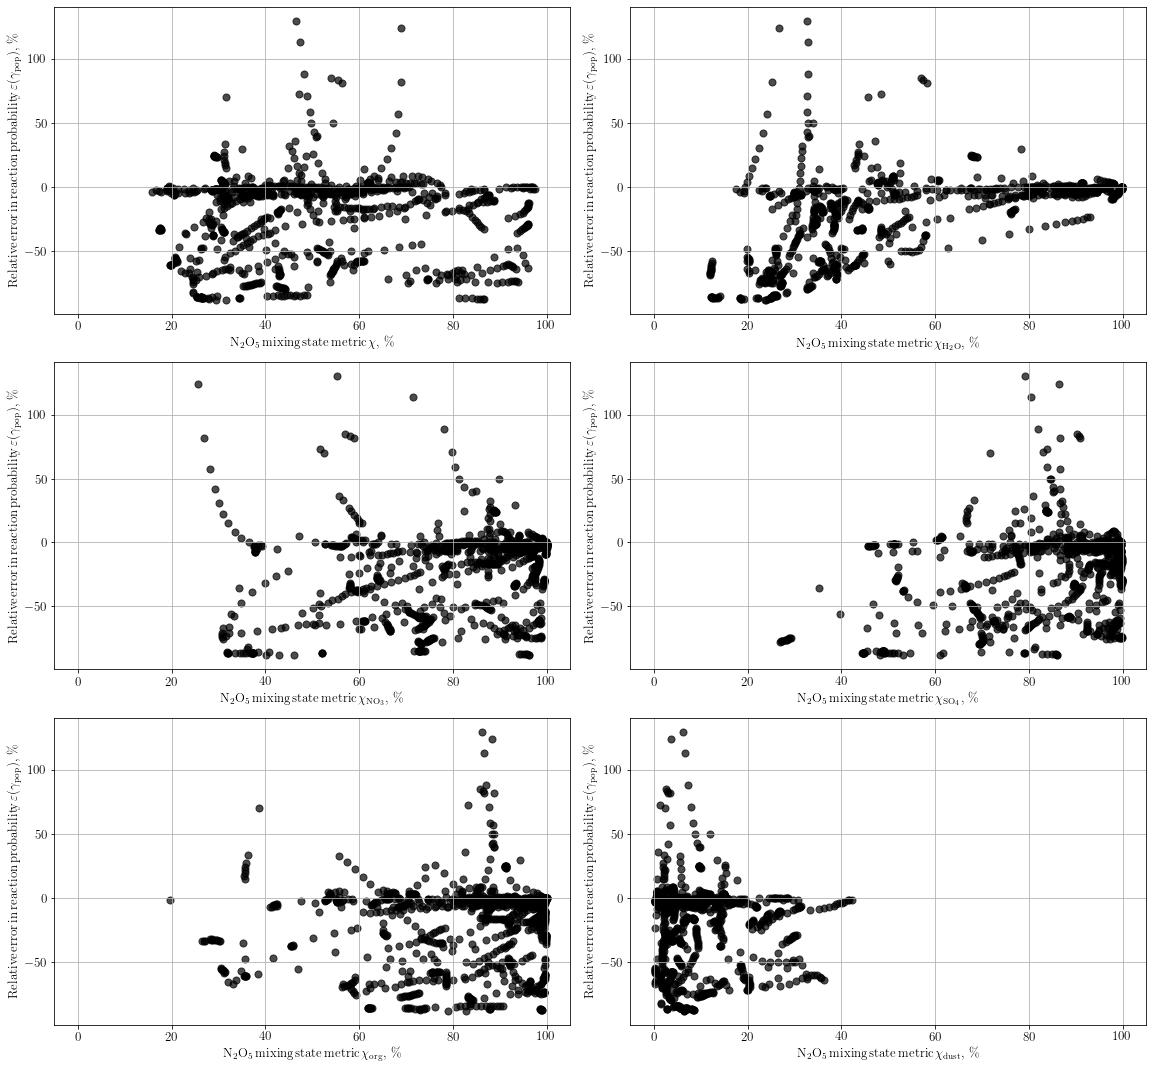

In [20]:
# Only nighttime cases
# df2 = df1[df1["wet_frac"] > 0]
# print(df2.shape)

# from matplotlib import style
# plt.style.use('classic')
# mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(5*1.618*2,15))
###################
plt.subplot(3,2,1)
im1 = plt.scatter(df1.chi_pr, df1.gamma_pop_error, color = 'k', alpha = 0.7, s= 50, vmin = 0, vmax = 100)
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
plt.grid()
###################
plt.subplot(3,2,2)
im1 = plt.scatter(df1.chi_h2o_pr, df1.gamma_pop_error, color = 'k', alpha = 0.7, s= 50, vmin = 0, vmax = 100)
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm H_2O}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
plt.grid()
###################
plt.subplot(3,2,3)
im1 = plt.scatter(df1.chi_no3_pr, df1.gamma_pop_error, color = 'k', alpha = 0.7, s= 50, vmin = 0, vmax = 100)
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm NO_3}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
plt.grid()
###################
plt.subplot(3,2,4)
im1 = plt.scatter(df1.chi_so4_pr, df1.gamma_pop_error, color = 'k', alpha = 0.7, s= 50, vmin = 0, vmax = 100)
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm SO_4}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
plt.grid()
###################
plt.subplot(3,2,5)
im1 = plt.scatter(df1.chi_org_pr, df1.gamma_pop_error, color = 'k', alpha = 0.7, s= 50, vmin = 0, vmax = 100)
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm org}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
plt.grid()
###################
plt.subplot(3,2,6)
im1 = plt.scatter(df1.chi_dust_pr, df1.gamma_pop_error, color = 'k', alpha = 0.7, s= 50, vmin = 0, vmax = 100)
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm dust}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
plt.grid()

plt.tight_layout(pad=1.0)
# plt.savefig('relative_error_vs_chi.pdf')

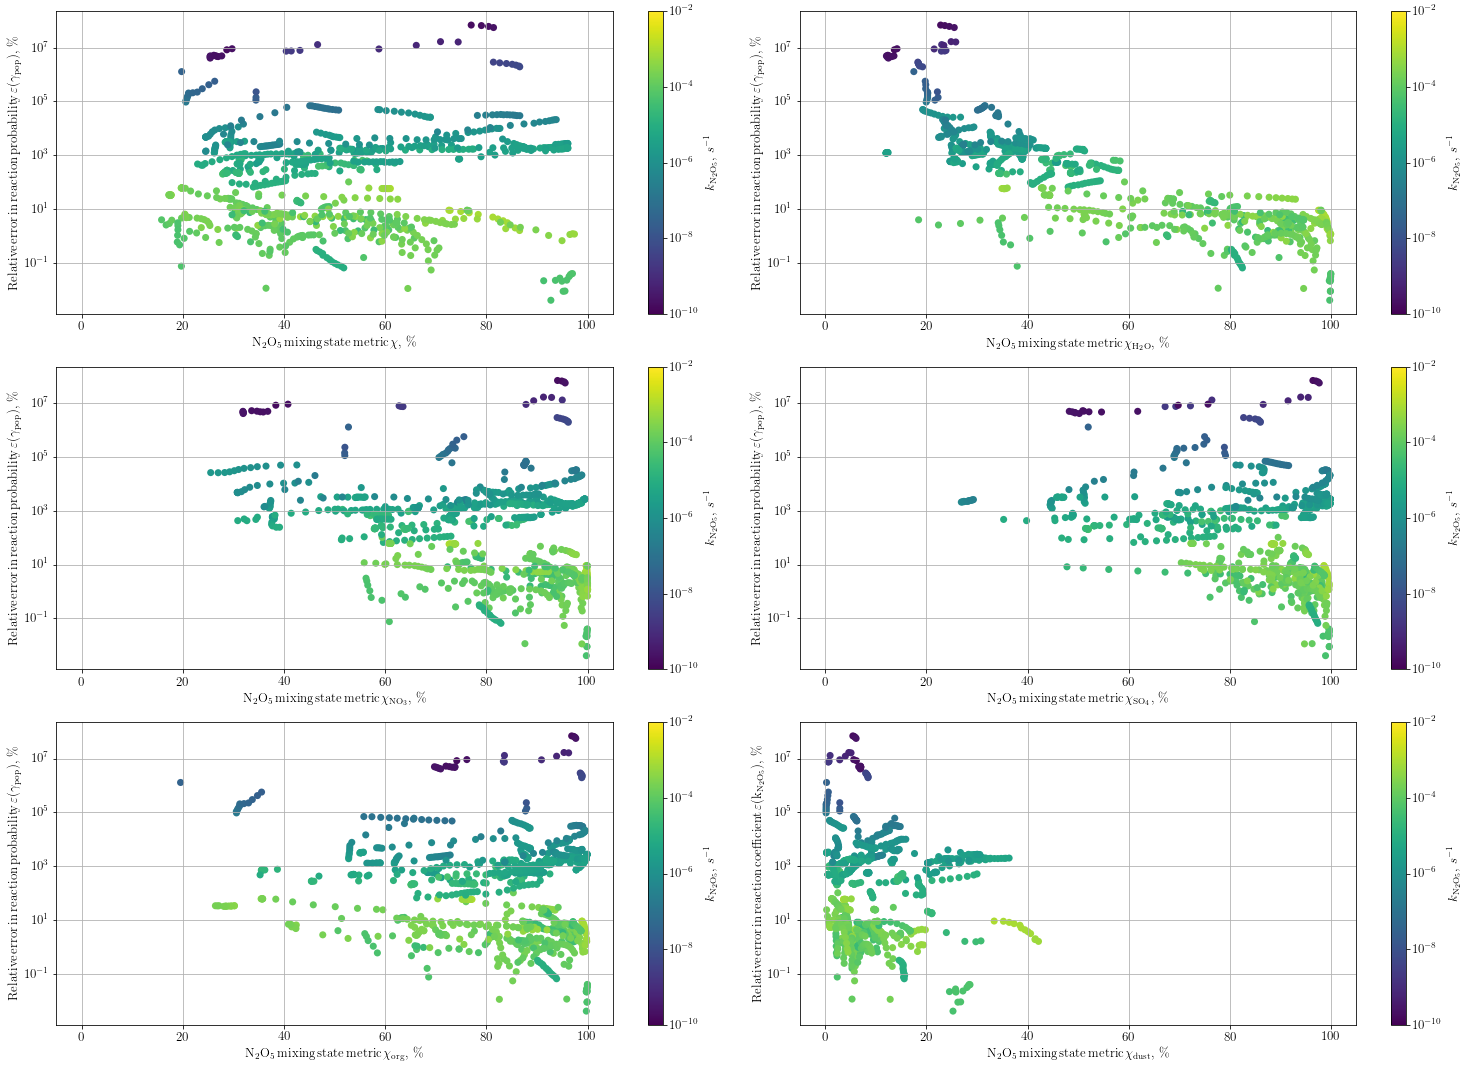

In [21]:
# Only nighttime cases
# df2 = df1[df1["wet_frac"] > 0]
# print(df2.shape)

# from matplotlib import style
# plt.style.use('classic')
# mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = True

# Only nighttime cases
# df2 = df1[df1["wet_frac"] > 0]
# print(df2.shape)

# from matplotlib import style
# plt.style.use('classic')
# mpl.rc("figure", facecolor="white")
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = True

plt.figure(figsize=(6.5*1.618*2,15))
###################
plt.subplot(3,2,1)
im1 = plt.scatter(df1.chi_pr, abs(df1.k_error), c = df1.k_ref, edgecolors = 'none', s= 50, norm=mpl.colors.LogNorm(1e-10, 1e-2))
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
cbar = plt.colorbar()
cbar.set_label(r'$k_{\rm N_2O_5},\,s^{-1}$')
plt.grid()
###################
plt.subplot(3,2,2)
im1 = plt.scatter(df1.chi_h2o_pr, abs(df1.k_error), c = df1.k_ref, edgecolors = 'none', s= 50, norm=mpl.colors.LogNorm(1e-10, 1e-2))
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm H_2O}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
cbar = plt.colorbar()
cbar.set_label(r'$k_{\rm N_2O_5},\,s^{-1}$')
plt.grid()
###################
plt.subplot(3,2,3)
im1 = plt.scatter(df1.chi_no3_pr, abs(df1.k_error), c = df1.k_ref, edgecolors = 'none', s= 50, norm=mpl.colors.LogNorm(1e-10, 1e-2))
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm NO_3}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
cbar = plt.colorbar()
cbar.set_label(r'$k_{\rm N_2O_5},\,s^{-1}$')
plt.grid()
###################
plt.subplot(3,2,4)
im1 = plt.scatter(df1.chi_so4_pr, abs(df1.k_error), c = df1.k_ref, edgecolors = 'none', s= 50, norm=mpl.colors.LogNorm(1e-10, 1e-2))
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm SO_4}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
cbar = plt.colorbar()
cbar.set_label(r'$k_{\rm N_2O_5},\,s^{-1}$')
plt.grid()
###################
plt.subplot(3,2,5)
im1 = plt.scatter(df1.chi_org_pr, abs(df1.k_error), c = df1.k_ref, edgecolors = 'none', s= 50, norm=mpl.colors.LogNorm(1e-10, 1e-2))
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm org}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, probability \, \varepsilon(\gamma_{\rm pop}), \, \%$')
cbar = plt.colorbar()
cbar.set_label(r'$k_{\rm N_2O_5},\,s^{-1}$')
plt.grid()
###################
plt.subplot(3,2,6)
im1 = plt.scatter(df1.chi_dust_pr, abs(df1.k_error), c = df1.k_ref, edgecolors = 'none', s= 50, norm=mpl.colors.LogNorm(1e-10, 1e-2))
plt.xlim(-5,105)
# plt.ylim(-10,110)
plt.yscale('log')
plt.xlabel(r'$\rm N_2O_5 \, mixing \, state \, metric \, \chi_{\rm dust}, \, \%$')
plt.ylabel(r'$\rm Relative \, error \, in \, reaction \, coefficient \, \varepsilon(k_{\rm N_2O_5}), \, \%$')
cbar = plt.colorbar()
cbar.set_label(r'$k_{\rm N_2O_5},\,s^{-1}$')
plt.grid()

plt.tight_layout(pad=1.0)
# plt.savefig('relative_error_vs_chi.pdf')

# low chi value cases

In [57]:
df_dust_lowchi = df1[(df1.chi_h2o_pr <= 20)]
print(df_dust_lowchi.shape)
print(df_dust_lowchi.sort_values('chi_h2o_pr', ascending=True))

case_index = df_dust_lowchi.index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49
print(sce_index)
print(hour_index)

(41, 22)
      gamma_pop_ref  gamma_pop_comp  gamma_pop_error         k_ref    k_comp  \
2635       0.007924        0.002557       -67.736613  5.945307e-06  0.000078   
2634       0.008203        0.002573       -68.633110  6.431359e-06  0.000083   
2636       0.007712        0.002540       -67.062180  5.575226e-06  0.000074   
2637       0.007525        0.002525       -66.438125  5.245491e-06  0.000070   
2638       0.007328        0.002511       -65.739808  4.934779e-06  0.000067   
3565       0.020000        0.002787       -86.066216  2.599242e-10  0.000013   
2639       0.007118        0.002496       -64.937392  4.668920e-06  0.000063   
2640       0.006908        0.002482       -64.066717  4.426281e-06  0.000059   
2641       0.006715        0.002465       -63.293608  4.164383e-06  0.000056   
3566       0.020000        0.002763       -86.186158  2.618534e-10  0.000012   
2642       0.006495        0.002449       -62.290542  3.955935e-06  0.000053   
2643       0.006222        0.00

In [8]:
s = pd.Series(['no3','so4','oc','soa','nh4','na','cl','bc','oin','h2o','ca','co3'])
print(len(s))
print(s)
print('bulk_'+ s[0] + '_masses')

12
0     no3
1     so4
2      oc
3     soa
4     nh4
5      na
6      cl
7      bc
8     oin
9     h2o
10     ca
11    co3
dtype: object
bulk_no3_masses


In [48]:
# Exclude seasalt & dust
directory = "/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust/1_part_res/scenarios"
bulk_masses = np.zeros((12,100,49))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename)
            for i in range(12):
                bulk_masses[i, sce, :] = ncf.variables['bulk_'+ s[i] + '_masses'].data * 1e9  # kg to µg

d_m = {'inorganics': (bulk_masses[0,:,:].ravel() + bulk_masses[1,:,:].ravel() + bulk_masses[4,:,:].ravel()
                    + bulk_masses[5,:,:].ravel() + bulk_masses[6,:,:].ravel() + bulk_masses[7,:,:].ravel()
                    + bulk_masses[10,:,:].ravel() + bulk_masses[11,:,:].ravel()),
        'oin': bulk_masses[8,:,:].ravel(),
        'h2o': bulk_masses[9,:,:].ravel(),
        'organics': (bulk_masses[2,:,:].ravel() + bulk_masses[3,:,:].ravel()),
        "chi_h2o_pr": chi_n2o5_dust[1,0,:,:].ravel() * 100}
df_m = pd.DataFrame(data=d_m)
print(df_m.shape)
# print(df_m)
df_m_2ndngt = df_m[((df_m.index.values % 49) >= 37) & ((df_m.index.values % 49) <= 48)]  # ngt: night
print(df_m_2ndngt.shape)
df_m_lowchi = df_m_2ndngt[(df_m_2ndngt.chi_h2o_pr <=20)]
print(df_m_lowchi.shape)
df_m_lowchi.round({'chi_h2o_pr':2})

df_m_highchi = df_m_2ndngt[(df_m_2ndngt.chi_h2o_pr >=98)]
print(df_m_highchi.shape)
df_m_highchi.round({'chi_h2o_pr':2})
# print(df_m_lowchi)

(4900, 5)
(1200, 5)
(41, 5)
(35, 5)


,inorganics,oin,h2o,organics,chi_h2o_pr
723,86.137070,1.156417,74.677465,6.312103,99.63
724,97.978051,1.082273,84.876612,8.167715,99.71
725,108.295927,1.041947,93.775819,9.942153,99.76
726,123.054108,0.992944,106.542814,11.936876,99.80
727,129.546151,0.951409,112.161631,12.507947,99.82
728,132.444333,0.913494,114.688675,12.193965,99.84
729,139.885961,0.865428,121.140598,11.867836,99.86
730,147.734073,0.815990,127.890870,11.563455,99.88
731,154.755722,0.735787,133.945947,11.235242,99.90
732,161.691691,0.695616,139.949988,10.903442,99.91


<AxesSubplot:xlabel='chi_h2o_pr'>

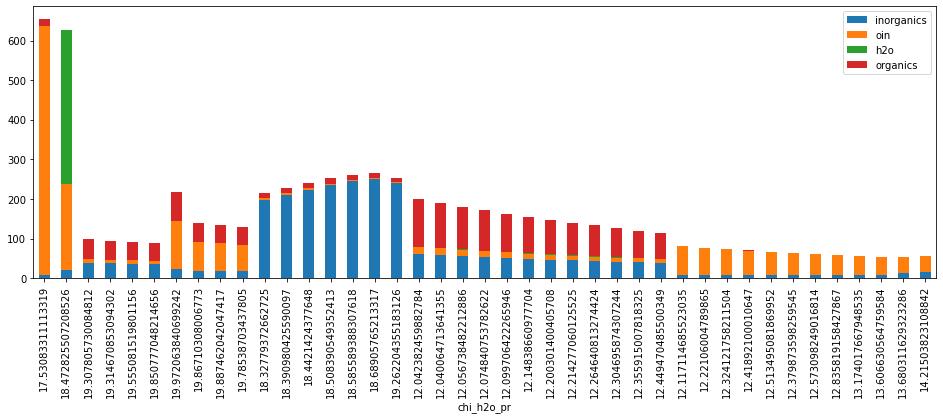

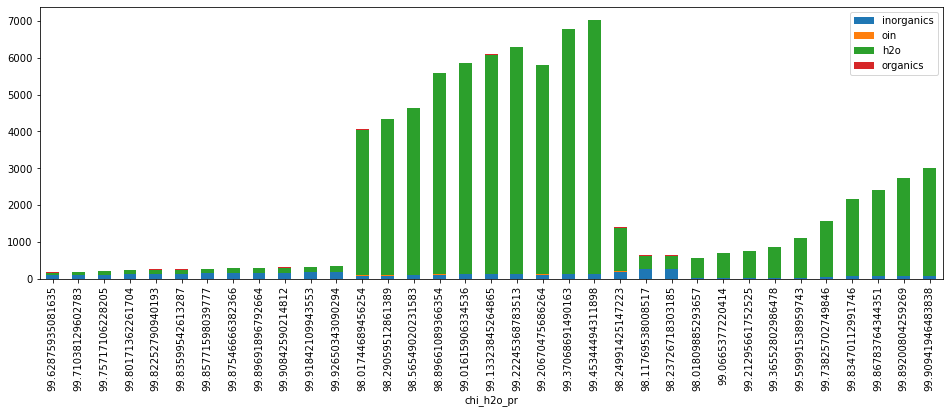

In [49]:
df_m_lowchi.plot(x = 'chi_h2o_pr', kind = 'bar', stacked = True, figsize=(10*1.618,5))
df_m_highchi.plot(x = 'chi_h2o_pr', kind = 'bar', stacked = True, figsize=(10*1.618,5))
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [60]:
# case 53, hr 38 lowest chi_h2o value
directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust/1_part_res/scenarios/scenario_0053'
mass_frac_dist = np.zeros((12,49,50,180))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_00000" in filename):
            nt_index = int(filename[-13:-11]) - 1
            nsce_index = int(filename[-38:-36])
            ncf  = scipy.io.netcdf_file(filename, mmap=False)
            diam_edges = ncf.variables["diam_edges"].data *1e6
            bc_edges = ncf.variables["bc_frac_edges"].data
            for i in range(12):
                mass_frac_dist[i, nt_index,:,:] = ncf.variables["diam_" + s[i] + "_dist_pr"].data * 1e-6

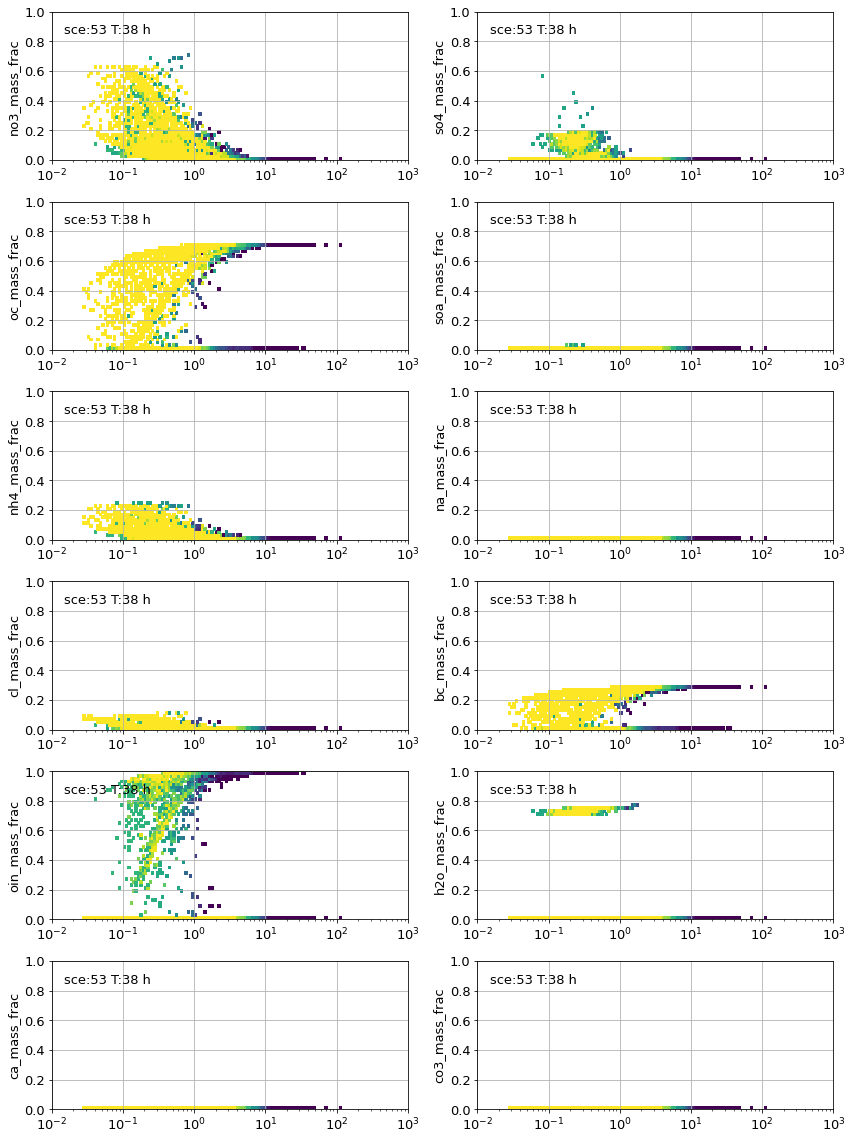

In [66]:
plt.figure(figsize=(12,16))
X, Y = np.meshgrid(diam_edges, bc_edges)
plt.rcParams['text.usetex'] = False

for i in range(12):
    plt.subplot(6,2,i+1)
    p = plt.pcolormesh (X, Y, mass_frac_dist[i,38,:,:], 
                        norm = mpl.colors.LogNorm(vmin=1e0, vmax=1e2), linewidths = 0.1)
    plt.xlim(1e-2,1e3)
    plt.xscale('log')
    plt.ylim(0,1)
    plt.ylabel(s[i] + "_mass_frac")
    plt.yscale('linear')
    plt.text(0.015, 0.85, r'sce:%d T:%d h '% (53, 38))
    plt.grid(True)
    plt.tight_layout(pad=1.0)

note: water affect n2o5 hydrolysis rate by controlling surface area -> only wet particles could be counted in, otherwise, gamma = 0 -> k = 0.

# time series comparison

## read data - dust

In [19]:
# Read data
gas_mixing_ratio = np.zeros((3, 100, 49, 77))
sce_ind = np.zeros(100)
lib_ind = np.zeros(3)
hour = np.zeros(49)
time = np.zeros(49)

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_0001" in filename) and (".nc") in filename:
#             print(filename)
            lib = int(filename[-67:-66])
            sce = int(filename[-35:-33])
            hr = int(filename[-5:-3]) - 1
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            gas_mixing_ratio[lib, sce, hr, :] = ncf.variables["gas_mixing_ratio"].data
            sce_ind[sce] = sce
            lib_ind[lib] = lib
            time[hr] =  ncf.variables["time"].data/3600
            hour[:] = hr

In [31]:
temp = np.zeros((100,49))
p = np.zeros((100,49))

for i in range(100):
    f = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust/1_part_res/scenarios/scenario_00'+str(i).zfill(2)+'/out/urban_plume_0001_env.txt'
    temp[i,:] = pd.read_csv(f,header=None,sep='\s+').iloc[:,1] # time, temperature, RH, pressure, mixing height
    p[i,:] = pd.read_csv(f,header=None,sep='\s+').iloc[:,3]

print(temp.shape)
print(temp)
print(p)
d_env = {'temp': temp[:,:].ravel(),
         'p': p[:,:].ravel()}
df_env = pd.DataFrame(data=d_env)
print(df_env.shape)
# rh = df_env.iloc[:,2]*100

(100, 49)
[[298.12  298.12  298.12  ... 298.12  298.12  298.12 ]
 [291.038 291.038 291.038 ... 291.038 291.038 291.038]
 [304.349 304.349 304.349 ... 304.349 304.349 304.349]
 ...
 [255.514 255.514 255.514 ... 255.514 255.514 255.514]
 [272.152 272.152 272.152 ... 272.152 272.152 272.152]
 [277.018 277.018 277.018 ... 277.018 277.018 277.018]]
[[100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 ...
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]]
(4900, 2)


In [48]:
d_gas = {'n2o5_ref': gas_mixing_ratio[1, :, :, 7].ravel(),
         'n2o5_comp': gas_mixing_ratio[2, :, :, 7].ravel(),
         'o3_ref': gas_mixing_ratio[1, :, :, 10].ravel(),
         'o3_comp': gas_mixing_ratio[2, :, :, 10].ravel(),
         'no_ref': gas_mixing_ratio[1, :, :, 4].ravel(),
         'no_comp': gas_mixing_ratio[2, :, :, 4].ravel(),
         'no2_ref': gas_mixing_ratio[1, :, :, 5].ravel(),
         'no2_comp': gas_mixing_ratio[2, :, :, 5].ravel(),
         'hno3_ref': gas_mixing_ratio[1, :, :, 1].ravel()*(df_env.p*63e-3)/(8.314*df_env.temp),
         'hno3_comp': gas_mixing_ratio[2, :, :, 1].ravel()*(df_env.p*63e-3)/(8.314*df_env.temp),
         }
df_gas = pd.DataFrame(data=d_gas)

In [49]:
df_gas_2ndngt = df_gas[((df_gas.index.values % 49) >= 37) & ((df_gas.index.values % 49) <= 48)]  # ngt: night
print(df_gas_2ndngt.shape)

df_gas_2ndday = df_gas[((df_gas.index.values % 49) >= 25) & ((df_gas.index.values % 49) <= 48)]
print(df_gas_2ndday.shape)

case_index = df_gas_2ndngt.index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49

dn_case_index = df_gas_2ndday.index.values  # dn: day and night
dn_sce_index  = (dn_case_index/49).astype(int)
dn_hour_index = dn_case_index % 49

(1200, 10)
(2400, 10)


In [35]:
#Read data
bulk_conc = np.zeros((3,2,100,49))

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process" in filename) and (".nc") in filename: 
#             print(filename)
            sce = int(filename[-29:-27])
            lib = int(filename[-61:-60])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            time = ncf.variables["time"].data/3600
#             print(time)
            bulk_conc[lib,0,sce,:] = ncf.variables["bulk_no3_masses"].data*1e9
            bulk_conc[lib,1,sce,:] = ncf.variables["bulk_nh4_masses"].data*1e9

no3_error = (bulk_conc[2, 0, :, :].ravel() - 
               bulk_conc[1, 0, :, :].ravel())/bulk_conc[1, 0, :, :].ravel()  
        
d_aero = {'no3_ref': bulk_conc[1, 0, :, :].ravel(),
          'no3_comp': bulk_conc[2, 0, :, :].ravel(),
          'no3_error': no3_error*100,
          'nh4_ref': bulk_conc[1, 1, :, :].ravel(),
          'nh4_comp': bulk_conc[2, 1, :, :].ravel()}
df_aero = pd.DataFrame(data=d_aero)
print(df_aero.shape)  

# time = np.linspace(0,120,121)
# print(time)

(4900, 5)


In [36]:
df_aero_2ndngt = df_aero[((df_aero.index.values % 49) >= 37) & ((df_aero.index.values % 49) <= 48)]  # ngt: night
print(df_aero_2ndngt.shape)

case_index = df_aero_2ndngt.index.values
sce_index  = (case_index/49).astype(int)
hour_index = case_index % 49

(1200, 5)


## plot

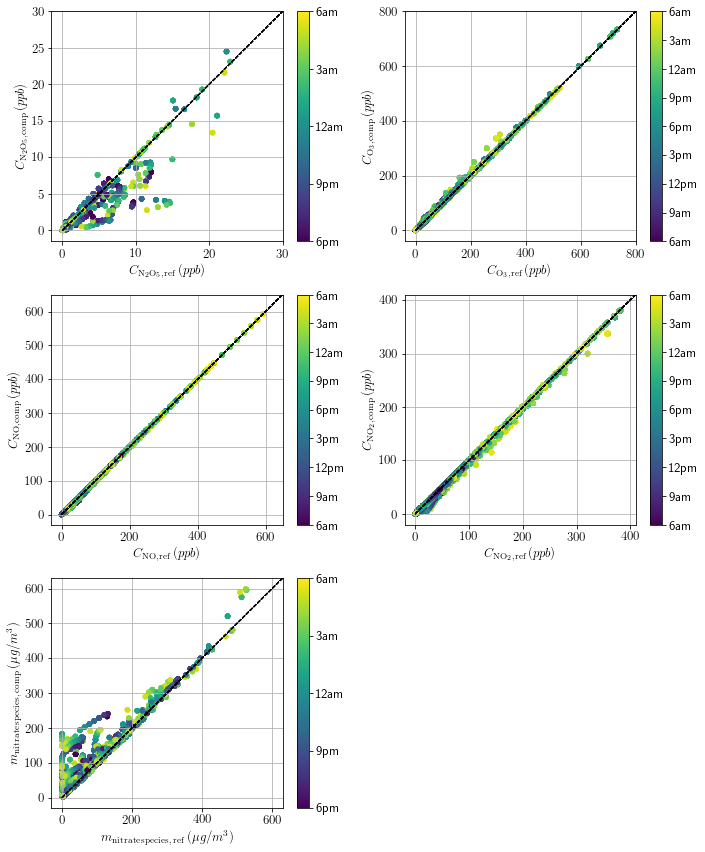

In [56]:
plt.figure(figsize=(10,12))
# from matplotlib import style
# plt.style.use('classic')
# plt.figure(facecolor="white")
# mpl.rc("figure", facecolor="white")

plt.subplot(3,2,1)
for t in range(37, 49, 1):
    p_n2o5 = plt.scatter(df_gas_2ndngt["n2o5_ref"], df_gas_2ndngt["n2o5_comp"], c=hour_index, s=30,edgecolors='none')   
    plt.plot([0,1e2],[0,1e2],'--', lw = 1, color='k')

plt.clim(37,49)
cbar = plt.colorbar(ticks = np.linspace(37,49,5))
cbar.ax.set_yticklabels(['6pm','9pm','12am','3am','6am'])
# ax.set_aspect('equal', adjustable='box')
plt.xlim(-1.5,30); plt.ylim(-1.5,30)
plt.xlabel(r'$C_{\rm N_2O_5, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm N_2O_5, comp} \, (ppb)$')
plt.grid()  
    
    
plt.subplot(3,2,2)
for t in range(25, 49, 1):
    p_o3 = plt.scatter(df_gas_2ndday["o3_ref"], df_gas_2ndday["o3_comp"], c=dn_hour_index, s=30,edgecolors='none')   
    plt.plot([0,1e3],[0,1e3],'--', lw = 1, color='k')

plt.clim(25,49)
cbar = plt.colorbar(ticks = np.linspace(25,49,9))
cbar.ax.set_yticklabels(['6am','9am','12pm','3pm','6pm','9pm','12am','3am','6am'])
plt.xlim(-40,800); plt.ylim(-40,800)
plt.xlabel(r'$C_{\rm O_3, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm O_3, comp} \, (ppb)$')
plt.grid()

plt.subplot(3,2,3)
for t in range(25, 49, 1):
    p_no = plt.scatter(df_gas_2ndday["no_ref"], df_gas_2ndday["no_comp"], c=dn_hour_index, s=30,edgecolors='none')   
    plt.plot([0,1e3],[0,1e3],'--', lw = 1, color='k')

plt.clim(25,49)
cbar = plt.colorbar(ticks = np.linspace(25,49,9))
cbar.ax.set_yticklabels(['6am','9am','12pm','3pm','6pm','9pm','12am','3am','6am'])
plt.xlim(-30,650); plt.ylim(-30,650)
plt.xlabel(r'$C_{\rm NO, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm NO, comp} \, (ppb)$')
plt.grid()

plt.subplot(3,2,4)
for t in range(25, 49, 1):
    p_no2 = plt.scatter(df_gas_2ndday["no2_ref"], df_gas_2ndday["no2_comp"], c=dn_hour_index, s=30,edgecolors='none')   
    plt.plot([0,1e3],[0,1e3],'--', lw = 1, color='k')

plt.clim(25,49)
cbar = plt.colorbar(ticks = np.linspace(25,49,9))
cbar.ax.set_yticklabels(['6am','9am','12pm','3pm','6pm','9pm','12am','3am','6am'])
plt.xlim(-20,410); plt.ylim(-20,410)
plt.xlabel(r'$C_{\rm NO_2, ref} \, (ppb)$')
plt.ylabel(r'$C_{\rm NO_2, comp} \, (ppb)$')
plt.grid()

plt.subplot(3,2,5)
for t in range(37, 49, 1):
    p_no3 = plt.scatter(df_aero_2ndngt["no3_ref"]+df_gas_2ndngt["hno3_ref"], df_aero_2ndngt["no3_comp"]+df_gas_2ndngt["hno3_comp"], c=hour_index, s=30,edgecolors='none')   
    plt.plot([0,3e3],[0,3e3],'--', lw = 1, color='k')

plt.clim(37,49)
cbar = plt.colorbar(ticks = np.linspace(37,49,5))
cbar.ax.set_yticklabels(['6pm','9pm','12am','3am','6am'])
plt.xlim(-30,630); plt.ylim(-30,630)
plt.xlabel(r'$m_{\rm nitrate\,species,\,ref} \, (\mu g/m^3)$')
plt.ylabel(r'$m_{\rm nitrate\,species,\,comp} \, (\mu g/m^3)$')
plt.grid()

# plt.subplot(3,2,6)
# for t in range(37, 49, 1):
#     p_hno3 = plt.scatter(df_gas_2ndngt["hno3_ref"], df_gas_2ndngt["hno3_comp"], c=hour_index, s=30,edgecolors='none')   
#     plt.plot([0,2e2],[0,2e2],'--', lw = 1, color='k')

# plt.clim(37,49)
# cbar = plt.colorbar(ticks = np.linspace(37,49,5))
# cbar.ax.set_yticklabels(['6pm','9pm','12am','3am','6am'])
# plt.xlim(-10,200); plt.ylim(-10,200)
# plt.xlabel(r'$C_{\rm HNO_3, ref} \, (ppb)$')
# plt.ylabel(r'$C_{\rm HNO_3, comp} \, (ppb)$')
# plt.grid()

plt.tight_layout(pad = 1.0)

# plt.savefig('mixing_state_impact_time_series.pdf')

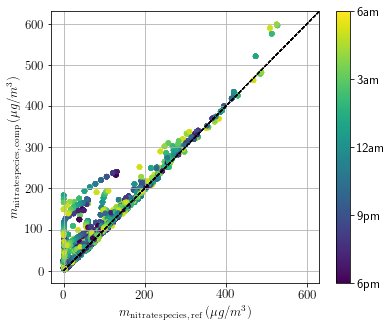

In [61]:
plt.figure(figsize=(6,5))
# from matplotlib import style
# plt.style.use('classic')
# plt.figure(facecolor="white")
# mpl.rc("figure", facecolor="white")

for t in range(37, 49, 1):
    p_no3 = plt.scatter(df_aero_2ndngt["no3_ref"]+df_gas_2ndngt["hno3_ref"], df_aero_2ndngt["no3_comp"]+df_gas_2ndngt["hno3_comp"], c=hour_index, s=30,edgecolors='none')   
    plt.plot([0,3e3],[0,3e3],'--', lw = 1, color='k')

plt.clim(37,49)
cbar = plt.colorbar(ticks = np.linspace(37,49,5))
cbar.ax.set_yticklabels(['6pm','9pm','12am','3am','6am'])
plt.xlim(-30,630); plt.ylim(-30,630)
plt.xlabel(r'$m_{\rm nitrate\,species,\,ref} \, (\mu g/m^3)$')
plt.ylabel(r'$m_{\rm nitrate\,species,\,comp} \, (\mu g/m^3)$')
plt.grid()

# plt.savefig('mixing_state_impact_time_series_nitrate_species.pdf')

# Parameter space

## aerosol

In [18]:
s = pd.Series(['no3','so4','oc','soa','nh4','na','cl','bc','oin','ca','co3','h2o'])
print(s)
print('bulk_'+ s[0] + '_masses')

0     no3
1     so4
2      oc
3     soa
4     nh4
5      na
6      cl
7      bc
8     oin
9      ca
10    co3
11    h2o
dtype: object
bulk_no3_masses


In [3]:
# Exclude seasalt & dust
directory = "/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nodust/1_part_res/scenarios"
bulk_masses = np.zeros((9,100,49))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename)
            for i in range(9):
                bulk_masses[i, sce, :] = ncf.variables['bulk_'+ s[i] + '_masses'].data * 1e9  # kg to µg

d_m = {'bulk_'+ s[0] + '_masses': bulk_masses[0,:,:].ravel(),
             'bulk_'+ s[1] + '_masses': bulk_masses[1,:,:].ravel(),
             'bulk_'+ s[2] + '_masses': bulk_masses[2,:,:].ravel(),
             'bulk_'+ s[3] + '_masses': bulk_masses[3,:,:].ravel(),
             'bulk_'+ s[4] + '_masses': bulk_masses[4,:,:].ravel(),
             'bulk_'+ s[5] + '_masses': bulk_masses[5,:,:].ravel(),
             'bulk_'+ s[6] + '_masses': bulk_masses[6,:,:].ravel(),
             'bulk_'+ s[7] + '_masses': bulk_masses[7,:,:].ravel(),
             'bulk_'+ s[8] + '_masses': bulk_masses[8,:,:].ravel(),
             'bulk_org_masses': bulk_masses[2,:,:].ravel() + bulk_masses[3,:,:].ravel()}
df_m = pd.DataFrame(data=d_m)
print(df_m.shape)
print(df_m)
df_m_2ndngt = df_m[((df_m.index.values % 49) >= 37) & ((df_m.index.values % 49) <= 48)]  # ngt: night
print(df_m_2ndngt.shape)

(4900, 10)
      bulk_no3_masses  bulk_so4_masses  bulk_oc_masses  bulk_soa_masses  \
0            0.017705         3.150289       12.545314         0.170569   
1            0.041664         3.722089       14.338594         0.423908   
2            0.133256         4.488890       17.309917         0.958120   
3            0.727913         5.329573       20.184846         1.745346   
4            5.151401         6.378695       23.127435         2.692576   
...               ...              ...             ...              ...   
4895        46.202150         1.729343        0.053183         3.201373   
4896        60.052256         2.357446        0.050743         4.760950   
4897        72.670143         3.173212        0.047767         6.756196   
4898        83.809382         4.127427        0.045351         9.003830   
4899        86.323766         4.789373        0.042091        10.483770   

      bulk_nh4_masses  bulk_na_masses  bulk_cl_masses  bulk_bc_masses  \
0            0.

In [20]:
# Exclude seasalt & dust
directory = "/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust/1_part_res/scenarios"
dust_bulk_masses = np.zeros((12,100,49))

for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_process.nc" in filename):
            sce = int(filename[-29:-27])
            ncf = scipy.io.netcdf_file(filename)
            for i in range(12):
                dust_bulk_masses[i, sce, :] = ncf.variables['bulk_'+ s[i] + '_masses'].data * 1e9  # kg to µg

d_mdust = {'bulk_'+ s[0] + '_masses': dust_bulk_masses[0,:,:].ravel(),
             'bulk_'+ s[1] + '_masses': dust_bulk_masses[1,:,:].ravel(),
             'bulk_'+ s[2] + '_masses': dust_bulk_masses[2,:,:].ravel(),
             'bulk_'+ s[3] + '_masses': dust_bulk_masses[3,:,:].ravel(),
             'bulk_'+ s[4] + '_masses': dust_bulk_masses[4,:,:].ravel(),
             'bulk_'+ s[5] + '_masses': dust_bulk_masses[5,:,:].ravel(),
             'bulk_'+ s[6] + '_masses': dust_bulk_masses[6,:,:].ravel(),
             'bulk_'+ s[7] + '_masses': dust_bulk_masses[7,:,:].ravel(),
             'bulk_'+ s[8] + '_masses': dust_bulk_masses[8,:,:].ravel(),
             'bulk_'+ s[9] + '_masses': dust_bulk_masses[9,:,:].ravel(),
             'bulk_'+ s[10] + '_masses': dust_bulk_masses[10,:,:].ravel(),
             'bulk_'+ s[11] + '_masses': dust_bulk_masses[11,:,:].ravel(),
             'bulk_org_masses': dust_bulk_masses[2,:,:].ravel() + dust_bulk_masses[3,:,:].ravel()}
df_mdust = pd.DataFrame(data=d_mdust)
print(df_mdust.shape)
print(df_mdust)
df_mdust_2ndngt = df_mdust[((df_mdust.index.values % 49) >= 37) & ((df_mdust.index.values % 49) <= 48)]  # ngt: night
print(df_mdust_2ndngt.shape)

(4900, 13)
      bulk_no3_masses  bulk_so4_masses  bulk_oc_masses  bulk_soa_masses  \
0           10.059261         0.434416       26.032273         0.907248   
1           16.765064         0.606875       30.044763         1.300910   
2           23.050837         0.761493       34.048249         1.657921   
3           27.867918         0.883405       36.423300         1.945146   
4           29.889344         0.946386       39.838175         2.110767   
...               ...              ...             ...              ...   
4895        94.120947         4.292188        0.449306         5.013613   
4896        94.950923         3.939194        0.425524         4.601353   
4897        99.550651         3.767670        0.408861         4.401159   
4898       101.738708         3.591467        0.381250         4.195680   
4899        97.687224         3.424285        0.362693         4.004672   

      bulk_nh4_masses  bulk_na_masses  bulk_cl_masses  bulk_bc_masses  \
0            3.

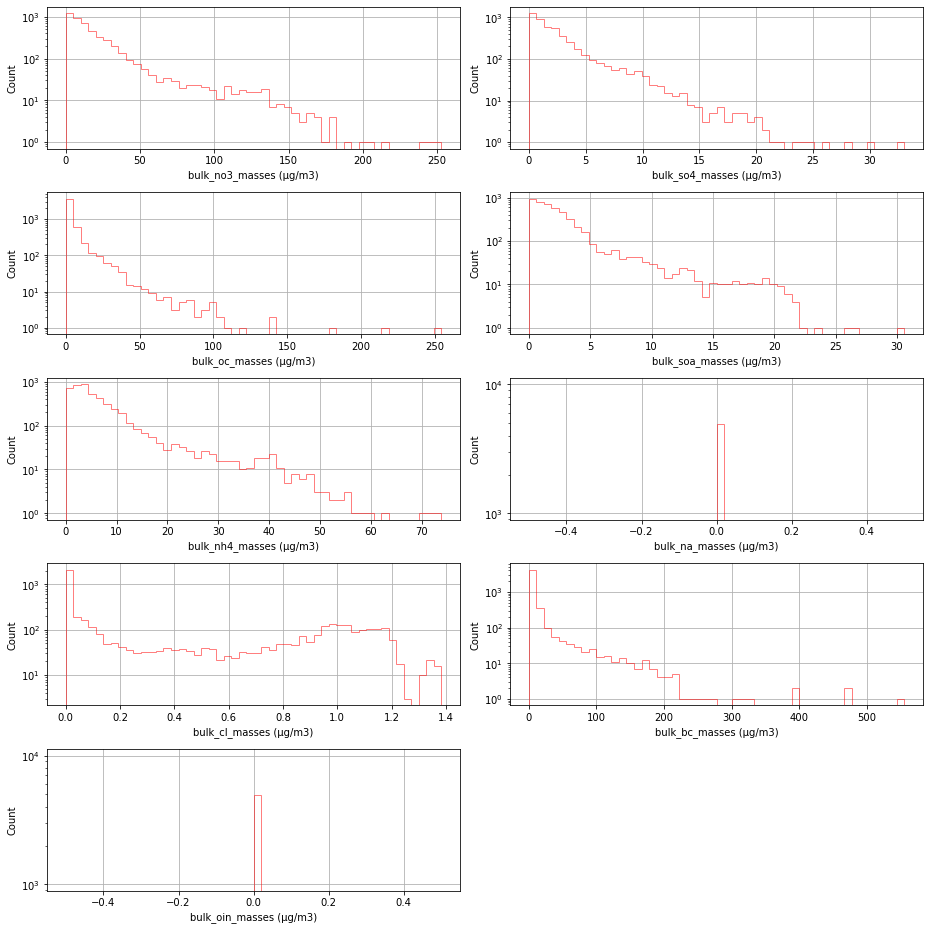

In [5]:
# black: no seasalt & dust, red: with seasalt & dust
plt.figure(figsize=(13,13))

for i in range(9):
    plt.subplot(5,2,i+1)
    plt.hist(data = df_m, x = 'bulk_'+ s[i] + '_masses', bins = 50, edgecolor= 'r', alpha=0.5, histtype = 'step')
    plt.xlabel('bulk_'+ s[i] + '_masses (µg/m3)')
    plt.yscale('LOG')
    # plt.xscale('log')
    plt.ylabel('Count')
#     plt.xlim(0, max(df_nsdm_2ndngt['bulk_'+ s[i] + '_masses']))
    plt.grid()
    plt.tight_layout(pad = 1.0)
    # plt.savefig('1.pdf')

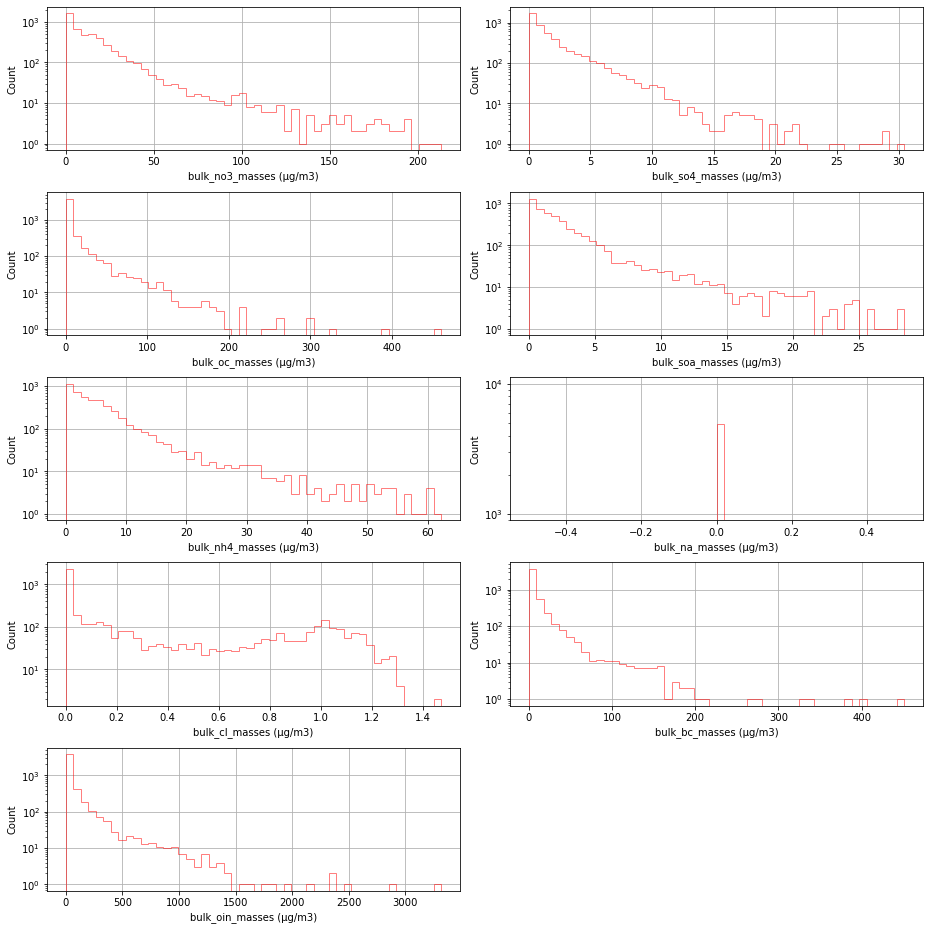

In [6]:
# black: no seasalt & dust, red: with seasalt & dust
plt.figure(figsize=(13,13))

for i in range(9):
    plt.subplot(5,2,i+1)
    plt.hist(data = df_mdust, x = 'bulk_'+ s[i] + '_masses', bins = 50, edgecolor= 'r', alpha=0.5, histtype = 'step')
    plt.xlabel('bulk_'+ s[i] + '_masses (µg/m3)')
    plt.yscale('LOG')
    # plt.xscale('log')
    plt.ylabel('Count')
#     plt.xlim(0, max(df_nsdm_2ndngt['bulk_'+ s[i] + '_masses']))
    plt.grid()
    plt.tight_layout(pad = 1.0)
    # plt.savefig('1.pdf')

## gas

In [7]:
s1 = pd.Series(['n2o5','o3','no','no2','hno3','h2so4','hcl','nh3'])
print(s1)

0     n2o5
1       o3
2       no
3      no2
4     hno3
5    h2so4
6      hcl
7      nh3
dtype: object


In [8]:
# Read data
gas_mixing_ratio = np.zeros((100, 49, 77))
sce_ind = np.zeros(100)
hour = np.zeros(49)
time = np.zeros(49)

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/nodust/1_part_res/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_0001" in filename) and (".nc") in filename:
#             print(filename)
            sce = int(filename[-35:-33])
            hr = int(filename[-5:-3]) - 1
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            gas_mixing_ratio[sce, hr, :] = ncf.variables["gas_mixing_ratio"].data
            sce_ind[sce] = sce
            time[hr] =  ncf.variables["time"].data/3600
            hour[:] = hr

In [9]:
d_gas = {'n2o5': gas_mixing_ratio[:, :, 7].ravel(),
         'o3': gas_mixing_ratio[:, :, 10].ravel(),
         'no': gas_mixing_ratio[:, :, 4].ravel(),
         'no2': gas_mixing_ratio[:, :, 5].ravel(),
         'hno3': gas_mixing_ratio[:, :, 1].ravel(),
         'h2so4': gas_mixing_ratio[:, :, 0].ravel(),
         'hcl': gas_mixing_ratio[:, :, 2].ravel(),
         'nh3': gas_mixing_ratio[:, :, 3].ravel(),
         }
df_gas = pd.DataFrame(data=d_gas)

In [10]:
# Read data
dust_gas_mixing_ratio = np.zeros((100, 49, 77))
sce_ind = np.zeros(100)
hour = np.zeros(49)
time = np.zeros(49)

directory = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust/1_part_res/scenarios'
for subdir, dirs, files in os.walk(directory):
    for file in files:
        filename = subdir + os.sep + file
        if ("out/urban_plume_0001" in filename) and (".nc") in filename:
#             print(filename)
            sce = int(filename[-35:-33])
            hr = int(filename[-5:-3]) - 1
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            dust_gas_mixing_ratio[sce, hr, :] = ncf.variables["gas_mixing_ratio"].data
            sce_ind[sce] = sce
            time[hr] =  ncf.variables["time"].data/3600
            hour[:] = hr

In [11]:
d_gasdust = {'n2o5': dust_gas_mixing_ratio[:, :, 7].ravel(),
         'o3': dust_gas_mixing_ratio[:, :, 10].ravel(),
         'no': dust_gas_mixing_ratio[:, :, 4].ravel(),
         'no2': dust_gas_mixing_ratio[:, :, 5].ravel(),
         'hno3': dust_gas_mixing_ratio[:, :, 1].ravel(),
         'h2so4': dust_gas_mixing_ratio[:, :, 0].ravel(),
         'hcl': dust_gas_mixing_ratio[:, :, 2].ravel(),
         'nh3': dust_gas_mixing_ratio[:, :, 3].ravel(),
         }
df_gasdust = pd.DataFrame(data=d_gasdust)

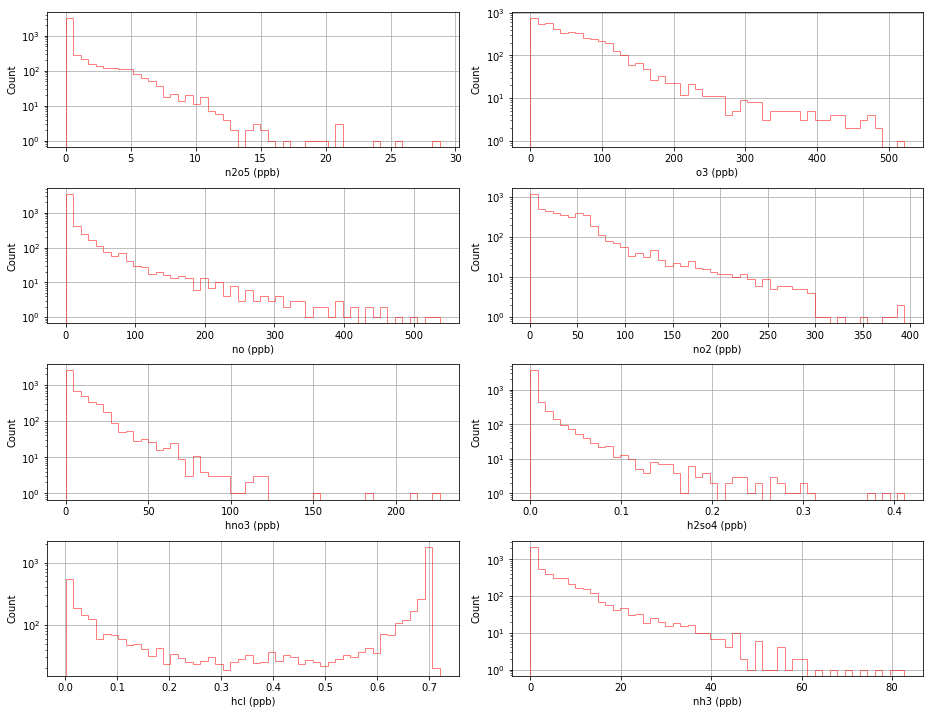

In [14]:
# black: no seasalt & dust, red: with seasalt & dust
plt.figure(figsize=(13,10))

for i in range(8):
    plt.subplot(4,2,i+1)
    plt.hist(data = df_gas, x = s1[i], bins = 50, edgecolor= 'r', alpha=0.5, histtype = 'step')
    plt.xlabel(s1[i] + ' (ppb)')
    plt.yscale('LOG')
    # plt.xscale('log')
    plt.ylabel('Count')
#     plt.xlim(0, max(df_nsdm_2ndngt['bulk_'+ s[i] + '_masses']))
    plt.grid()
    plt.tight_layout(pad = 1.0)
    # plt.savefig('1.pdf')

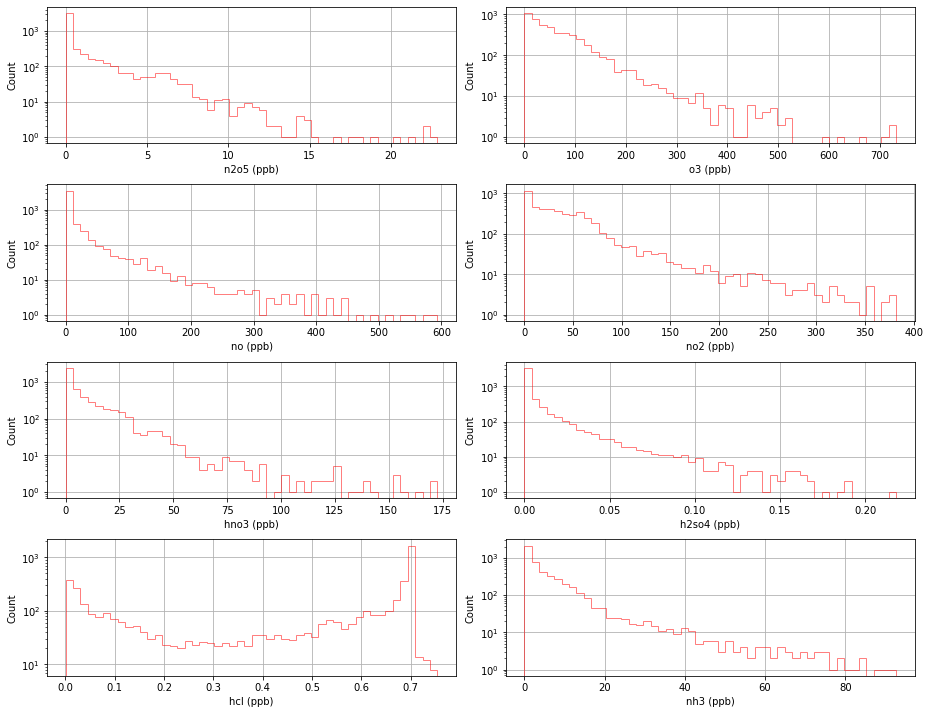

In [15]:
# black: no seasalt & dust, red: with seasalt & dust
plt.figure(figsize=(13,10))

for i in range(8):
    plt.subplot(4,2,i+1)
    plt.hist(data = df_gasdust, x = s1[i], bins = 50, edgecolor= 'r', alpha=0.5, histtype = 'step')
    plt.xlabel(s1[i] + ' (ppb)')
    plt.yscale('LOG')
    # plt.xscale('log')
    plt.ylabel('Count')
#     plt.xlim(0, max(df_nsdm_2ndngt['bulk_'+ s[i] + '_masses']))
    plt.grid()
    plt.tight_layout(pad = 1.0)
    # plt.savefig('1.pdf')

In [16]:
temp = np.zeros((100,49))
p = np.zeros((100,49))

for i in range(100):
    f = '/data/keeling/a/yicenl2/d/project_n2o5/scenario_libs/dust/1_part_res/scenarios/scenario_00'+str(i).zfill(2)+'/out/urban_plume_0001_env.txt'
    temp[i,:] = pd.read_csv(f,header=None,sep='\s+').iloc[:,1] # time, temperature, RH, pressure, mixing height
    p[i,:] = pd.read_csv(f,header=None,sep='\s+').iloc[:,3]

print(temp.shape)
print(temp)
print(p)
d_env = {'temp': temp[:,:].ravel(),
         'p': p[:,:].ravel()}
df_env = pd.DataFrame(data=d_env)
print(df_env.shape)
# rh = df_env.iloc[:,2]*100

(100, 49)
[[298.12  298.12  298.12  ... 298.12  298.12  298.12 ]
 [291.038 291.038 291.038 ... 291.038 291.038 291.038]
 [304.349 304.349 304.349 ... 304.349 304.349 304.349]
 ...
 [255.514 255.514 255.514 ... 255.514 255.514 255.514]
 [272.152 272.152 272.152 ... 272.152 272.152 272.152]
 [277.018 277.018 277.018 ... 277.018 277.018 277.018]]
[[100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 ...
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]
 [100000. 100000. 100000. ... 100000. 100000. 100000.]]
(4900, 2)


In [21]:
hno3_mass_conc = dust_gas_mixing_ratio[:, :, 1].ravel()*(df_env.p*63e-3)/(8.314*df_env.temp)
h2so4_mass_conc = dust_gas_mixing_ratio[:, :, 0].ravel()*(df_env.p*98e-3)/(8.314*df_env.temp)

d_species = {'nitrate': hno3_mass_conc + dust_bulk_masses[0,:,:].ravel(),
             'sulfate': h2so4_mass_conc + dust_bulk_masses[1,:,:].ravel(),
             'organic': dust_bulk_masses[2,:,:].ravel() + dust_bulk_masses[3,:,:].ravel(),
             'dust': dust_bulk_masses[8,:,:].ravel(),
             'h2o': dust_bulk_masses[11,:,:].ravel(),
             'n2o5': dust_gas_mixing_ratio[:, :, 7].ravel(),
             'o3': dust_gas_mixing_ratio[:, :, 10].ravel(),
             'no': dust_gas_mixing_ratio[:, :, 4].ravel(),
             'no2': dust_gas_mixing_ratio[:, :, 5].ravel(),}
df_species = pd.DataFrame(data = d_species)
print(df_species.shape)

(4900, 9)


In [22]:
s2 = pd.Series(['nitrate','sulfate','organic','dust','h2o','n2o5','o3','no','no2'])
print(len(s2))
print(s2)

9
0    nitrate
1    sulfate
2    organic
3       dust
4        h2o
5       n2o5
6         o3
7         no
8        no2
dtype: object


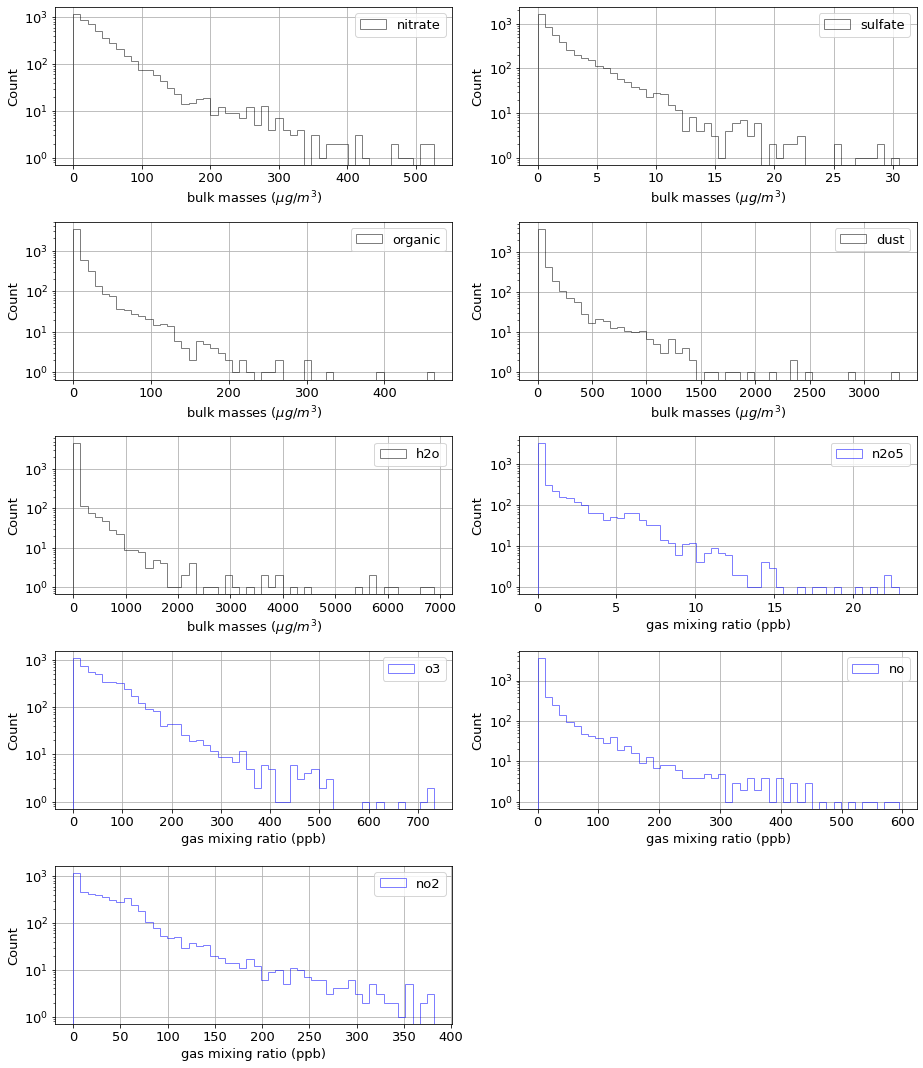

In [23]:
plt.figure(figsize=(13,15))
mpl.rcParams['font.size'] = 13
plt.rcParams['text.usetex'] = False

for i in range(5):
    plt.subplot(5,2,i+1)
    plt.hist(data = df_species, x = s2[i], bins = 50, edgecolor= 'k', alpha=0.5, histtype = 'step', label = s2[i])
    plt.xlabel(r'bulk masses ($\mu g/m^3$)')
    plt.yscale('LOG')
    plt.ylabel('Count')
#     plt.xlim(0, max(df_nsdm_2ndngt['bulk_'+ s[i] + '_masses']))
    plt.legend()
    plt.grid()
for i in [5,6,7,8]:
    plt.subplot(5,2,i+1)
    plt.hist(data = df_species, x = s2[i], bins = 50, edgecolor= 'b', alpha=0.5, histtype = 'step', label = s2[i])
    plt.xlabel(r'gas mixing ratio (ppb)')
    plt.yscale('LOG')
    plt.ylabel('Count')
#     plt.xlim(0, max(df_nsdm_2ndngt['bulk_'+ s[i] + '_masses']))
    plt.legend()
    plt.grid()

plt.tight_layout(pad = 1.0)
# plt.savefig('1.pdf')